# Exam 1

This activity is intended to assess your knowledge
in formulating engineering problems as univariate root-finding tasks,
as well as in applying relevant numerical methods to solve them.

## Scenario

Two batching plants -- Bonnie and Clyde --
have respective ratings of
$p_{1}$ kilowatts and $q_{2}$ kilovars,
have respective lagging power factors of
$\phi_{1}$ and $\phi_{2}$,
and
are separately served by dedicated feeders
whose respective impedances are
$r_{1} + j x_{1}$
and
$r_{2} + j x_{2}$ ohms.
The feeders branch out from a substation bus
regulated around a nominal voltage of $u$ kilovolts.

The main objective is to determine the phase-angle difference
between the rated operating voltages of Bonnie and of Clyde.
One way to accomplish the main objective is
to solve for the operating voltage magnitudes of Bonnie and of Clyde
(say, $v_{1}$ and $v_{2}$, respectively).
With such values,
determining the desired phase-angle difference
is a matter of analysis and complex-number arithmetic.

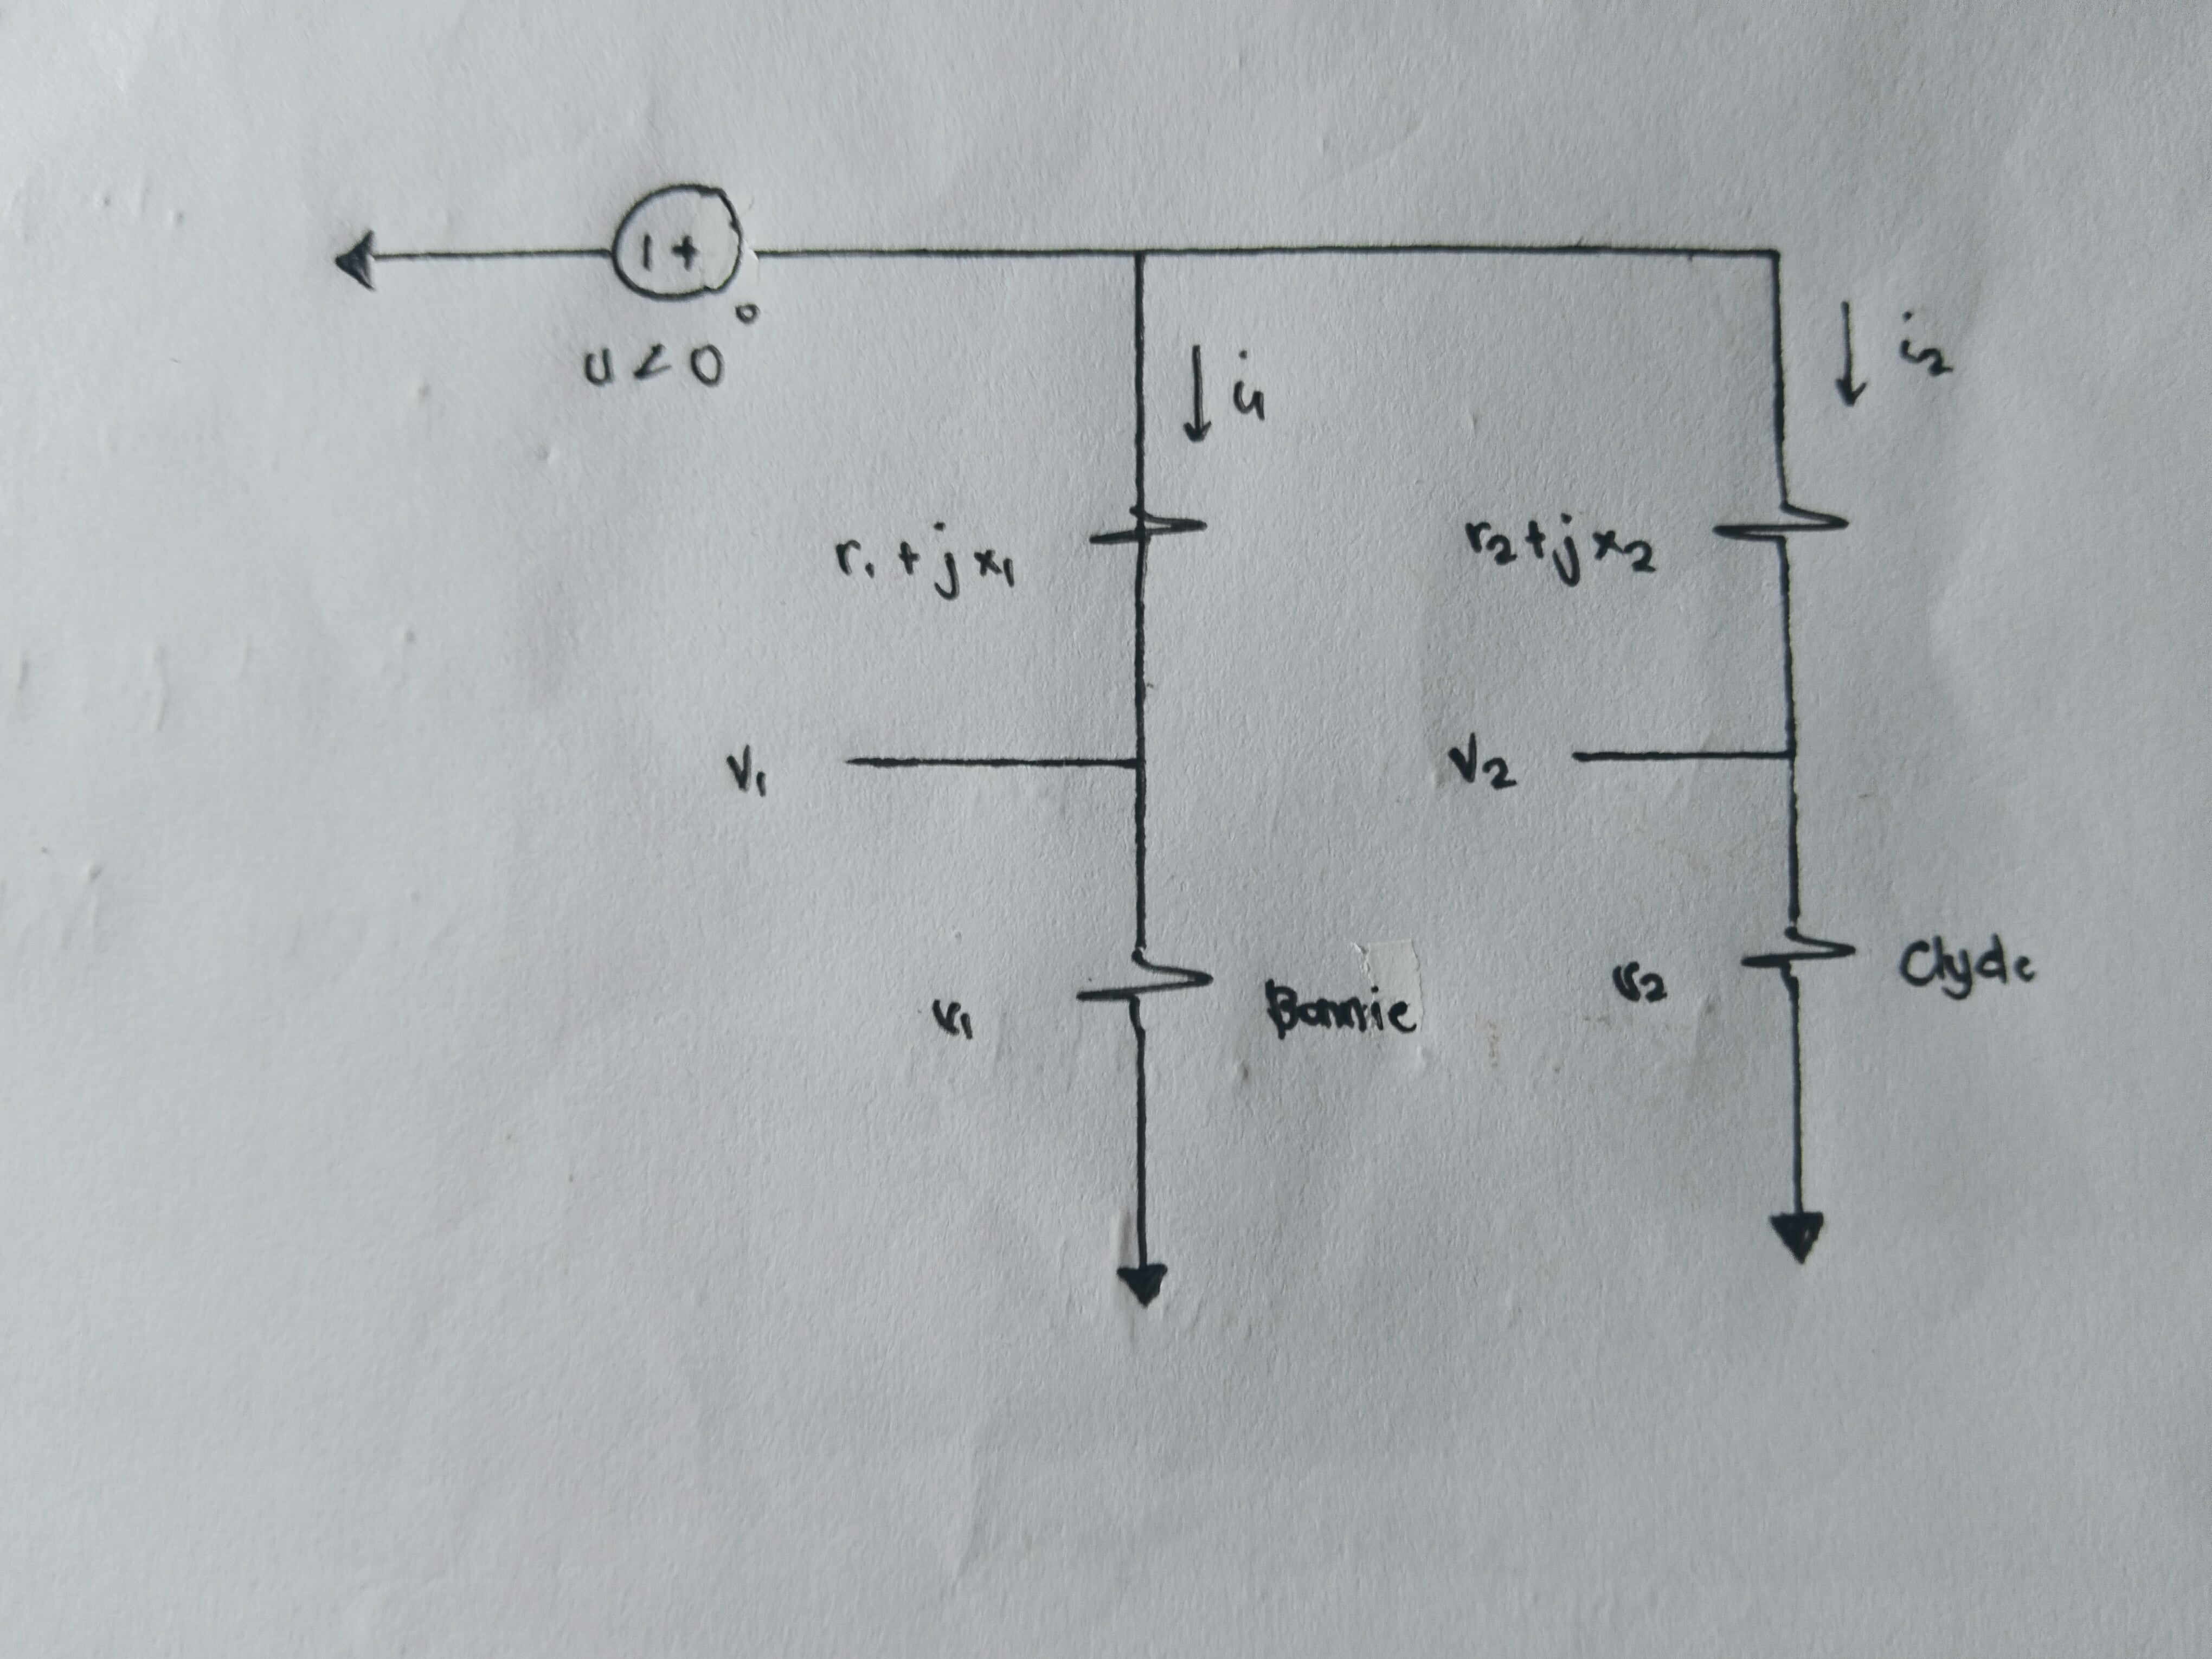

## Part I

This is the Written component of the exam.

### Question 1

Derive a univariate function $f\!\left(v\right)$ whose root is $v_{1}$.

### Question 2

Derive a univariate function $g\!\left(v\right)$ whose root is $v_{2}$.

### Question 3

Describe how to calculate the desired phase-angle difference
using $v_{1}$ and $v_{2}$.

### Question 4

If you are to solve for $v_{1}$ using the bisection method,
how will you set the search interval?

### Question 5

If you are to solve for $v_{2}$ using the Newton-Raphson method,
how will you set the initial estimate?

### Question 6

If you are to solve for $v_{1}$ using the Newton-Raphson method,
derive an iteration scheme of the form
$v_{k+1} \gets v_{k} + h\!\left(v_{k}\right)$.

### Question 7

Reason out whether or not the desired phase-angle difference can take on multiple values.

### Question 8

In your stay so far in the university,
what do you consider to be the most profound
thing you have heard or learned from a teacher?

## Part II

This is the Programming component of the exam.

Set the power ratings as follows.
- M34W12 class:
  $p_{1} = 450$, $\phi_{1} = 0.87$, $q_{2} = 300$, and $\phi_{2} = 0.90$
- M34W34 class:
  $p_{1} = 375$, $\phi_{1} = 0.95$, $q_{2} = 325$, and $\phi_{2} = 0.80$
- H34W56 class:
  $p_{1} = 425$, $\phi_{1} = 0.75$, $q_{2} = 275$, and $\phi_{2} = 0.75$
- H34W78 class:
  $p_{1} = 301$, $\phi_{1} = 0.73$, $q_{2} = 334$, and $\phi_{2} = 0.84$

Set the feeder line parameters as follows.
- M34W12 class:
  $r_{1} = 0.97$, $x_{1} = 2.45$, $r_{2} = 0.99$, and $x_{2} = 2.51$
- M34W34 class:
  $r_{1} = 0.95$, $x_{1} = 2.54$, $r_{2} = 1.01$, and $x_{2} = 2.75$
- H34W56 class:
  $r_{1} = 1.01$, $x_{1} = 2.75$, $r_{2} = 0.95$, and $x_{2} = 2.54$
- H34W78 class:
  $r_{1} = 0.99$, $x_{1} = 2.51$, $r_{2} = 0.97$, and $x_{2} = 2.45$

Adopting real-world conditions,
the substation bus voltage is allowed to vary within 10 % of the nominal.
(Exceeding this range indicates undervoltage or overvoltage.)
Set the substation bus voltage as follows.
- M34W12 class: the minimum allowed for a $u = 49.0$
- M34W34 class: the maximum allowed for a $u = 13.8$
- H34W56 class: the minimum allowed for a $u = 13.8$
- H34W78 class: the maximum allowed for a $u = 49.0$

### Preliminaries

In [1]:
import math as mt

import scipy.optimize as spo

Define the following Python functions.
- `f()`, implementing $f\!\left(v\right)$
- `g()`, implementing $g\!\left(v\right)$
- `df()`, implementing the derivative of $f\!\left(v\right)$ w.r.t. $v$
- `dg()`, implementing the derivative of $g\!\left(v\right)$ w.r.t. $v$

Each of these functions should have the following inputs.
- `v`,
  a positional argument that represents the operating voltage
- `v_ss`,
  a keyword argument that represents the substation bus voltage
  and defaults to the nominal value

Lastly, define a Python function
`calc_angle_diff()` that returns the desired phase-angle difference
(in radians)
given two inputs:
- `v1`, the first positional argument representing $v_{1}$,
  and
- `v2`, the first positional argument representing $v_{2}$.

Replace the `pass` statements in the succeeding code cells.

In [2]:
def v_ss():
    u_min = 13800
    return 13800 - (0.1 * 13800)

In [3]:
print("Substation voltage:", v_ss(), "Volts")

Substation voltage: 12420.0 Volts


In [4]:
def f(v,v_ss):
    return ((v**2 + 1459990.615) / v_ss)**2 + (-790187.0832 / v_ss)**2 - v**2 # in Volts, see supplementary file for derivation

In [5]:
def g(v,v_ss):
    return ((v**2 + 994729.6557) / v_ss)**2 + (-530774.55139 / v_ss)**2 - v**2 # in Volts, see supplementary file for derivation

In [6]:
def df(v,v_ss):
    return 2 * v * (2 * ((v1**2 + 1459990.615) / v_ss**2) - 1) # in Volts, see supplementary file for derivation

In [7]:
def dg(v,v_ss):
    return 2 * v2 * (2 * ((v**2 + 994729.6557) / v_ss**2) - 1) # in Volts, see supplementary file for derivation

In [8]:
def calc_angle_diff(v1,v2):
    return (mt.atan (-790187.0832 / (v1**2 + 1459990.615))) - mt.atan (-530774.55139/ (v2**2 + 994729.6557))  # in radians, see supplementary file for derivation

### Using the bisection method

In solving for $v_{1}$,
define Python variables `_V1L` and `_V1U`
to store the lower and the upper ends of the search interval.
Similarly define Python variables `_V2L` and `_V2U`
in solving for $v_{2}$.

Run 
[`scipy.optimize.bisect()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
such that you get
the (approximate) root
as well as information concerning the run.
Store the (approximate) root and the information in Python variables

- `v1_bs` and `v1_bs_info`, respectively, for $v_{1}$; and
- `v2_bs` and `v2_bs_info`, respectively, for $v_{2}$.

Set tolerances and iteration budget to their corresponding default values.

Replace the `pass` statement in the succeeding cells with the appropriate code.

In [9]:
# Define bisection parameters

_V1U = v_ss ()
_V1L = 0.95 * _V1U # just a heuristic guess

_V2U = v_ss ()
_V2L = 0.95 * _V2U # just a heuristic guess


# Use scipy bisection method for v1
v1_bs, v1_bs_info = spo.bisect(
    f, _V1L, _V1U, args=(v_ss(),), full_output = True, disp = False
)

# Use scipy bisection method for v2
v2_bs, v2_bs_info = spo.bisect(
    g, _V2L, _V2U, args=(v_ss(),), full_output = True, disp = False
)

In [10]:
print("-----")
print(v1_bs_info)
print("-----")
print(v2_bs_info)

-----
      converged: True
           flag: converged
 function_calls: 48
     iterations: 46
           root: 12301.14651996391
         method: bisect
-----
      converged: True
           flag: converged
 function_calls: 48
     iterations: 46
           root: 12339.310826672416
         method: bisect


In [11]:
print(f"Solving for Bonnie's operating voltage using the bisection method...")
print(f"\tinterval: {_V1L} to {_V1U} volts")
print(f"\troot: {v1_bs_info.root:.8f}")
print(f"\tresidual: {f(v1_bs, v_ss())}")

Solving for Bonnie's operating voltage using the bisection method...
	interval: 11799.0 to 12420.0 volts
	root: 12301.14651996
	residual: -2.9802322387695312e-08


In [12]:
print(f"Solving for Clyde's operating voltage using the bisection method...")
print(f"\tinterval: {_V2L} - {_V2U} volts")
print(f"\troot: {v2_bs_info.root:.8f}")
print(f"\tresidual: {g(v2_bs, v_ss())}")

Solving for Clyde's operating voltage using the bisection method...
	interval: 11799.0 - 12420.0 volts
	root: 12339.31082667
	residual: 5.960464477539063e-08


In [13]:
v1 = v1_bs_info.root
v2 = v2_bs_info.root

θ1 = mt.atan (-790187.0832 / (v1**2 + 1459990.615))
θ2 = mt.atan (-530774.55139/ (v2**2 + 994729.655))

In [14]:
print(f"Phase-angle v1: {θ1:.4e} radian")
print(f"Phase-angle v2: {θ2:.4e} radian")
print(f"Phase-angle difference: {calc_angle_diff(v1,v2):.4e} radian")
print(f"Hence, v1 leads v2 by {calc_angle_diff(v1,v2):.4e} radian")

Phase-angle v1: -5.1721e-03 radian
Phase-angle v2: -3.4634e-03 radian
Phase-angle difference: -1.7087e-03 radian
Hence, v1 leads v2 by -1.7087e-03 radian


### Using the Newton-Raphson method

In solving for $v_{1}$,
define a Python variable `_V1NR`
to store the initial estimate.
Similarly define a Python variable `_V2NR`
in solving for $v_{2}$.

Run
[`scipy.optimize.newton()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
such that you get the (approximate) root as well as convergence information.
Store the (approximate) root and the information in Python variables

- `v1_nr` and `v1_nr_info`, respectively, for $v_{1}$; and
- `v2_nr` and `v2_nr_info`, respectively, for $v_{2}$.

Set tolerances and iteration budget to their corresponding default values.

Replace the `pass` statement in the succeeding cell with your code.

In [15]:
# Define Newton parameters
_V1NR = 12301.14652 # both roots from quadratic approximation are physical. another possible root to use is 134.956 Volts, see supplementary file for solution
_V2NR = 12339.31083 # both roots from quadratic approximation are physical. another possible root to use is 91.373 Volts, see supplementary file for solution

# Use scipy newton method for v1
v1_nr, v1_nr_info = spo.newton(
    f, x0 = _V1NR, fprime = df, args=(v_ss(),),  full_output=True, disp=False
)

# Use scipy newton method for v1
v2_nr, v2_nr_info = spo.newton(
    g, x0 = _V2NR, fprime = dg, args=(v_ss(),),  full_output=True, disp=False
)

In [16]:
print("-----")
print(v1_nr_info)
print("-----")
print(v2_nr_info)

-----
      converged: True
           flag: converged
 function_calls: 4
     iterations: 2
           root: 12301.146519963911
         method: newton
-----
      converged: True
           flag: converged
 function_calls: 4
     iterations: 2
           root: 12339.310826672414
         method: newton


In [17]:
print(f"Solving for Bonnie's operating voltage using the Newton-Raphson method...")
print(f"\tstart: {_V1NR} volts")
print(f"\troot: {v1_nr_info.root:.8f}")
print(f"\tresidual: {f(v1_nr, v_ss())}")

Solving for Bonnie's operating voltage using the Newton-Raphson method...
	start: 12301.14652 volts
	root: 12301.14651996
	residual: 2.9802322387695312e-08


In [18]:
print(f"Solving for Clyde's operating voltage using the Newton-Raphson method...")
print(f"\tstart: {_V2NR} volts")
print(f"\troot: {v2_nr_info.root:.8f}")
print(f"\tresidual: {g(v2_nr, v_ss())}")

Solving for Clyde's operating voltage using the Newton-Raphson method...
	start: 12339.31083 volts
	root: 12339.31082667
	residual: 2.9802322387695312e-08


In [19]:
v1 = v1_nr_info.root
v2 = v2_nr_info.root

θ1 = mt.atan (-790187.0832 / (v1**2 + 1459990.615))
θ2 = mt.atan (-530774.55139/ (v2**2 + 994729.655))

In [20]:
print(f"Phase-angle v1: {θ1:.4e} radian")
print(f"Phase-angle v2: {θ2:.4e} radian")
print(f"Phase-angle difference: {calc_angle_diff(v1,v2):.4e} radian")
print(f"Hence, v1 leads v2 by {calc_angle_diff(v1,v2):.4e} radian")

Phase-angle v1: -5.1721e-03 radian
Phase-angle v2: -3.4634e-03 radian
Phase-angle difference: -1.7087e-03 radian
Hence, v1 leads v2 by -1.7087e-03 radian


### Using the secant method

In solving for $v_{1}$,
define a Python variable `_V1SC`
to store the initial estimate.
Similarly define a Python variable `_V2SC`
in solving for $v_{2}$.

Run
[`scipy.optimize.newton()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
such that you get the (approximate) root as well as information concerning the run.
Store the (approximate) root and the information in Python variables

- `v1_sc` and `v1_sc_info`, respectively, for $v_{1}$; and
- `v2_sc` and `v2_sc_info`, respectively, for $v_{2}$.

Set tolerances and iteration budget to their corresponding default values.

Replace the `pass` statement in the succeeding cell with your code.

In [21]:
# Define secant parameters
_V1SC = 12301.14652 # both roots from quadratic approximation are physical. another possible root to use is 134.956 Volts, see supplementary file for solution
_V2SC = 12339.31083 # both roots from quadratic approximation are physical. another possible root to use is 91.373 Volts, see supplementary file for solution


# Use scipy newton method for v1
v1_sc, v1_sc_info = spo.newton(
    f, x0 = _V1SC, args=(v_ss(),), full_output=True, disp=False
)

# Use scipy newton method for v2
v2_sc, v2_sc_info = spo.newton(
    g, x0 = _V2SC, args=(v_ss(),), full_output=True, disp=False
)

In [22]:
print("-----")
print(v1_sc_info)
print("-----")
print(v2_sc_info)

-----
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: 12301.146519963911
         method: secant
-----
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: 12339.310826672412
         method: secant


In [23]:
print(f"Solving for Bonnie's operating voltage using the secant method...")
print(f"\tstart: {_V1SC} volts")
print(f"\troot: {v1_sc_info.root:.8f}")
print(f"\tresidual: {f(v1_sc, v_ss())}") # initial guess is closer to the true root, the secant iterations converge with fewer steps and land exactly on a floating-point value where: f(v1) = 0, hence 0 residual

Solving for Bonnie's operating voltage using the secant method...
	start: 12301.14652 volts
	root: 12301.14651996
	residual: 2.9802322387695312e-08


In [24]:
print(f"Solving for Clyde's operating voltage using the secant method...")
print(f"\tstart: {_V2SC} volts")
print(f"\troot: {v2_sc_info.root:.8f}")
print(f"\tresidual: {g(v2_sc, v_ss())}")

Solving for Clyde's operating voltage using the secant method...
	start: 12339.31083 volts
	root: 12339.31082667
	residual: -2.9802322387695312e-08


In [25]:
v1 = v1_sc_info.root
v2 = v2_sc_info.root

θ1 = mt.atan (-790187.0832 / (v1**2 + 1459990.615))
θ2 = mt.atan (-530774.55139/ (v2**2 + 994729.655))

In [26]:
print(f"Phase-angle v1: {θ1:.4e} radian")
print(f"Phase-angle v2: {θ2:.4e} radian")
print(f"Phase-angle difference: {calc_angle_diff(v1,v2):.4e} radian")
print(f"Hence, v1 leads v2 by {calc_angle_diff(v1,v2):.4e} radian")

Phase-angle v1: -5.1721e-03 radian
Phase-angle v2: -3.4634e-03 radian
Phase-angle difference: -1.7087e-03 radian
Hence, v1 leads v2 by -1.7087e-03 radian


### In phasor form

In [27]:
print(f"The magnitude of v1 is: {v1_sc_info.root:.8f} Volts, with angle: {θ1:.4e} radian.")
print(f"The magnitude of v2 is: {v2_sc_info.root:.8f} Volts, with angle: {θ2:.4e} radian.")

The magnitude of v1 is: 12301.14651996 Volts, with angle: -5.1721e-03 radian.
The magnitude of v2 is: 12339.31082667 Volts, with angle: -3.4634e-03 radian.


## Instructions and reminders

### Written exam component

Write your answers in white A4 papers.
Use one (1) inch for the top, left, right, and bottom margins.
Write only on one page of a sheet.
Staple the sheets at the upper-left corner of the pages.

Corresponding maximum marks for Questions 1 - 7 are as follows.
- thirty (30) points for each of Questions 1 and 2
- ten (10) points for Question 3
- five (5) points for each of Questions 4 - 7

Question 8 is a bonus worth three (3) points.

The use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, include a brief closing section
(titled "Declaration on the use of AI tools")
declaring which and how AI tools are used in your work,
or non-use thereof.

### Programming component

Do not use any library or module other than those in the imports cell.

In addition to replacing the `pass` statements,
you also need to fix some intentional errors.

For each method,
- getting the correct value of $v_{1}$ merits ten (10) points,
- getting the correct value of $v_{2}$ merits ten (10) points,
- getting the correct value of the phase-angle difference merits ten (10) points,
  and
- getting a reasonable residual merits two (2) points.

Meeting the above conditions and all instructions
further merits a point.
Each non-compliance to an instruction, however, means a deduction of two (2) points.
Thus, one may earn up to 100 points for the programming component,
as long as
- all instructions are met,
- all code cells run properly in succession,
  and
- all computed quantities are (acceptably) equal to those in a held-out answer key.

Download this notebook file,
and save with a filename following the pattern
`EXM-01_<section>_<ID number>`,
where the section is as reflected in your Google Classroom.
For example,
if your ID number is 2013-0024
and you are enrolled in the M34W12 class,
then your notebook should be named
`EXM-01_M34W12_2013-0024.ipynb`.
Submit your notebook via the classwork platform for Exam 1 in Google Classroom.
Submissions beyond the deadline will not be considered.

The use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, please include a brief statement
(in a private comment to this classwork)
declaring which and how AI tools are used in your work,
or non-use thereof.

*Last updated by Christian Cahig on 2025-10-22*